In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as Tk

In [2]:
df=pd.read_csv("housing.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
df.describe(include='all')

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000
unique,NaN,NaN,NaN,NaN,NaN,NaN,5000
top,NaN,NaN,NaN,NaN,NaN,NaN,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
freq,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06,NaN
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05,NaN
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04,NaN
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05,NaN
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06,NaN
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06,NaN


In [5]:
df["Address"].nunique()

5000

In [6]:
df["Price"].nunique()

5000

In [7]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [11]:
target=df["Price"]

<AxesSubplot:>

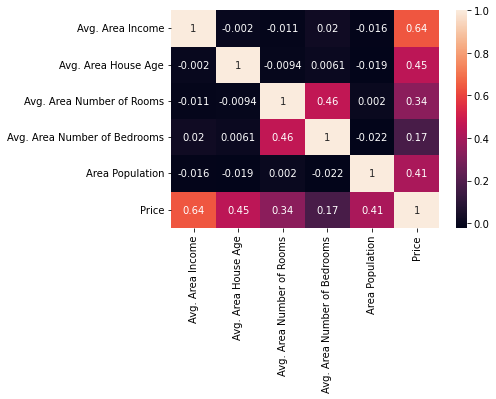

In [9]:
sns.heatmap(df.corr(),annot=True)

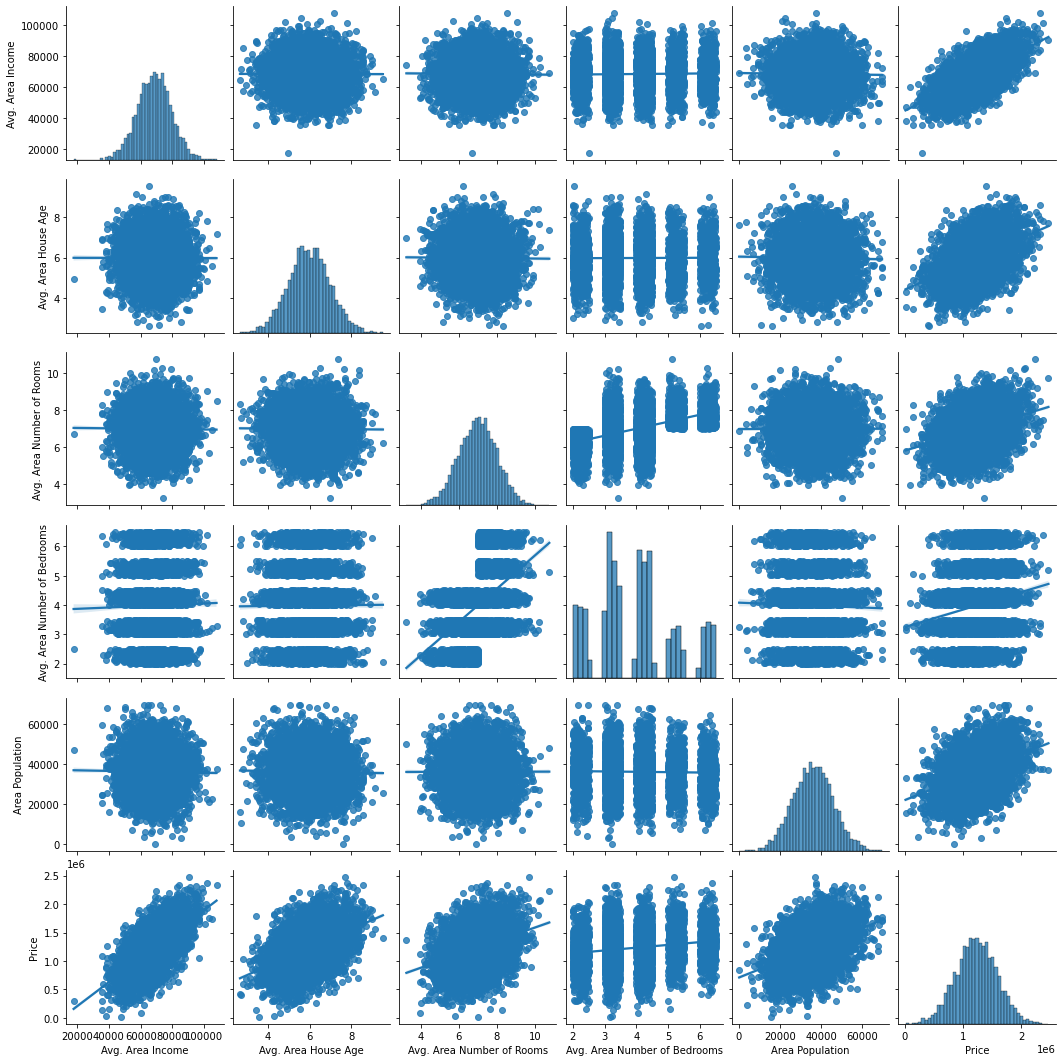

In [12]:
sns.pairplot(data=df, kind='reg')

In [13]:
target=df["Price"]
features=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
        'Area Population']]

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features, target, test_size=0.25, random_state=101)

In [15]:
xtrain.shape

(3750, 4)

In [16]:
xtest.shape

(1250, 4)

In [18]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)


LinearRegression()

In [19]:
model.score(xtest,ytest)*100

91.70576659270534

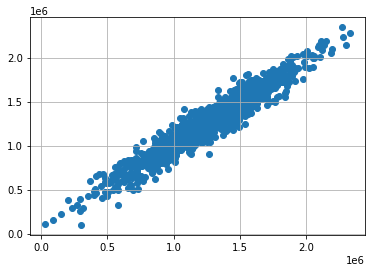

In [20]:
ypred_test=model.predict(xtest)
plt.scatter(ytest,ypred_test)
plt.grid()

In [21]:
query_data={'Avg. Area Income':[200000],'Avg. Area House Age':[6], 'Avg. Area Number of Rooms':[5],
        'Area Population':[3000]}
result=model.predict(pd.DataFrame(query_data))
print(result[0])

3331803.4396823244


In [22]:
pd.to_pickle(model,'HousePrice.pickle')